In [1]:
!pip install scapy

  Created wheel for scapy: filename=scapy-2.4.5-py2.py3-none-any.whl size=1261554 sha256=5cc4d04345fa92e28643e4892441e5fbd45501a28e3450eae3f3b20f9ac8d13e
  Stored in directory: c:\users\ramir\appdata\local\pip\cache\wheels\c8\9b\2f\012f0dbaf869afac8be52d4423f34eaa0b6c5c2d1292e40ebd
Successfully built scapy


In [2]:
from scapy.all import *
original = rdpcap('dump.pcap')
len(original)

45066

In [57]:
# pcap = original
pcap = []
for packet in original:
    if packet.src == '18:c0:4d:36:21:e3':
        pcap.append(packet)
pcap = pcap[:500]
# PacketList(pcap).summary()


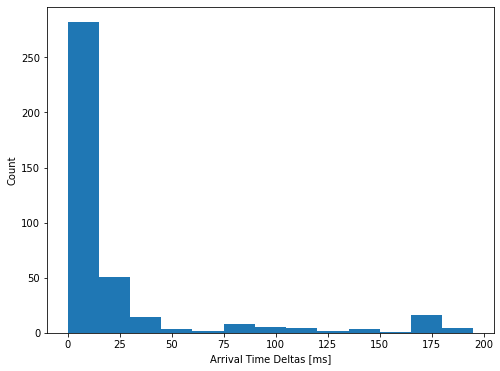

In [61]:
#Podemos crear listas con los valores de los datos capturados
times = [pcap[i].time for i in range(len(pcap))]
#times
deltas = [(times[i+1]-times[i])*1000 for i in range(len(times)-1)]
import matplotlib.pyplot as plt
import numpy as np
bins = np.arange(0, 200, 15)
plt.figure(figsize=(8, 6))
plt.hist(deltas, bins=bins)
plt.xlabel('Arrival Time Deltas [ms]')
plt.ylabel('Count')
plt.show()

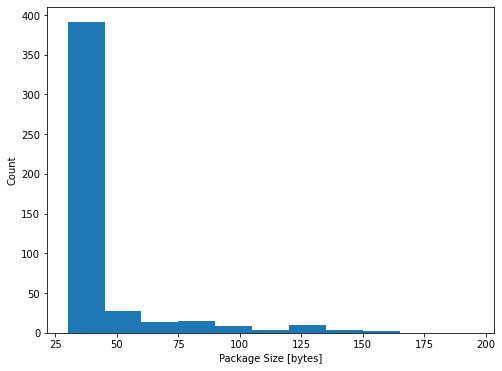

In [66]:
sizes = [pcap[i].len for i in range(len(pcap))]
import matplotlib.pyplot as plt
import numpy as np
bins = np.arange(30, 200, 15)
plt.figure(figsize=(8, 6))
plt.hist(sizes, bins=bins)
plt.xlabel('Package Size [bytes]')
plt.ylabel('Count')
plt.show()

<Figure size 432x288 with 0 Axes>

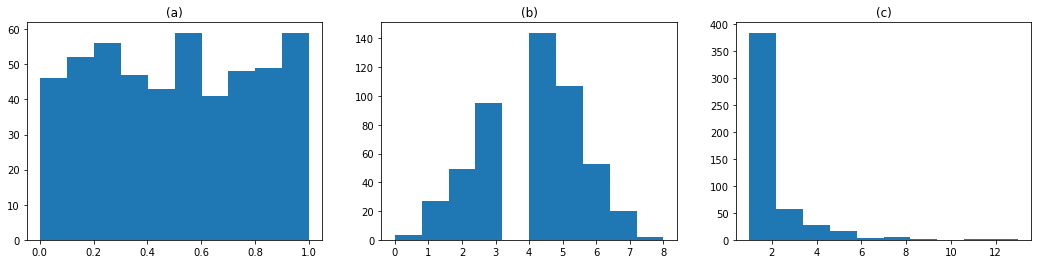

In [94]:
plt.figure()
fig, (uniform, binomial, geometric) = plt.subplots(1, 3, figsize=(18, 4))

# fig.suptitle('Ejemplo de distribuciones estadísticas')
import numpy as np
t = 500 #@param {type:"slider", min:1, max:1000, step:1}
randvals = [np.random.random() for i in range(t)]
uniform.hist(randvals)
uniform.set_title('(a)')

from scipy.stats import binom
n = 10 #@param {type:"slider", min:1, max:100, step:1}
p = 0.4 #@param {type:"slider", min:0, max:1, step:0.01}
t = 500 #@param {type:"slider", min:1, max:1000, step:1}
randproc = binom(n,p)
randvals = randproc.rvs(t)
binomial.hist(randvals)
binomial.set_title('(b)')

from scipy.stats import geom
p = 0.5 #@param {type:"slider", min:0, max:1, step:0.01}
t = 500 #@param {type:"slider", min:1, max:10000, step:1}
randproc = geom(p)
randvals = randproc.rvs(t)
import matplotlib.pyplot as plt
geometric.hist(randvals)
geometric.set_title('(c)')


plt.show()

In [12]:
import numpy as np


mkv_chn = np.matrix([[0, 0.3, 0.7, 0],
                      [0.9, 0, 0, 0.1],
                      [0, 0.55, 0, 0.45],
                      [0.5, 0, 0, 0.5]])
initial = np.matrix([1, 0, 0, 0])

for n in range(0,16):
    vec = np.asarray(initial*mkv_chn**n).reshape(-1)
    # print(np.asarray(vec).reshape(-1))
    print(f'{n} & {vec[0]:.5f} & {vec[1]:.5f} & {vec[2]:.5f} & {vec[3]:.5f}')

0 & 1.00000 & 0.00000 & 0.00000 & 0.00000
1 & 0.00000 & 0.30000 & 0.70000 & 0.00000
2 & 0.27000 & 0.38500 & 0.00000 & 0.34500
3 & 0.51900 & 0.08100 & 0.18900 & 0.21100
4 & 0.17840 & 0.25965 & 0.36330 & 0.19865
5 & 0.33301 & 0.25333 & 0.12488 & 0.28878
6 & 0.37239 & 0.16859 & 0.23311 & 0.22592
7 & 0.26469 & 0.23993 & 0.26067 & 0.23472
8 & 0.33329 & 0.22278 & 0.18528 & 0.25865
9 & 0.32982 & 0.20189 & 0.23330 & 0.23498
10 & 0.29919 & 0.22726 & 0.23088 & 0.24267
11 & 0.32587 & 0.21674 & 0.20943 & 0.24795
12 & 0.31904 & 0.21295 & 0.22811 & 0.23990
13 & 0.31160 & 0.22117 & 0.22333 & 0.24389
14 & 0.32100 & 0.21631 & 0.21812 & 0.24456
15 & 0.31696 & 0.21627 & 0.22470 & 0.24207
